### Libraries used

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad
from IPython import display
import time

### Functions and constants

In [96]:
global alpha, T, m, n, H, Q, Z
n = 15
H = n*n
alpha = 0
T = 0
m = 0.5
Z = 1 #(?)

In [6]:
def utility_function_per_block(pho):
    if(pho <= 0.5):
        res = 2*pho
    else:
        res = 2*(m-1)*pho + (2 - m)
    return res

In [7]:
def entropy_per_block(pho):
    res = -pho*np.log(pho) - (1-pho)*np.log((1-pho))
    return res

In [8]:
def link_function_per_block(pho):
    a = 0
    b = pho
    I = quad(utility_function_per_block, a, b)
    return I[0]

In [9]:
def thermodynamic_potential_F_per_block(pho):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

In [10]:
def utility_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += pho * utility_function_per_block(pho)
    summation *= H
    return summation

In [11]:
def link_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += link_function_per_block(pho)
    summation *= H
    return summation

In [12]:
def thermodynamic_potential_F(pho_array):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block(pho)
    summation *= H
    return summation

In [46]:
# not useful because the results are too large
def probability_function(pho_array):
    res = 1/Z * np.exp(1/T * thermodynamic_potential_F(pho_array))
    return res

In [56]:
"""def partition_function(pho_array):
    summation = 0
    for pho in pho_array:
        summation += np.exp( 1/T * thermodynamic_potential_F(pho))

SyntaxError: incomplete input (3690124766.py, line 1)

### Analysis

#### Utility per block

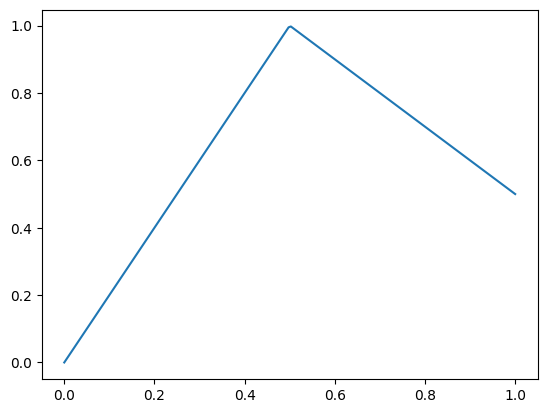

In [122]:
epsilon = 0
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
utility = np.zeros(steps)
for i in range(steps):
    utility[i] = utility_function_per_block(phos[i])

plt.figure()
plt.plot(phos,utility)
plt.show()

#### Entropy per block

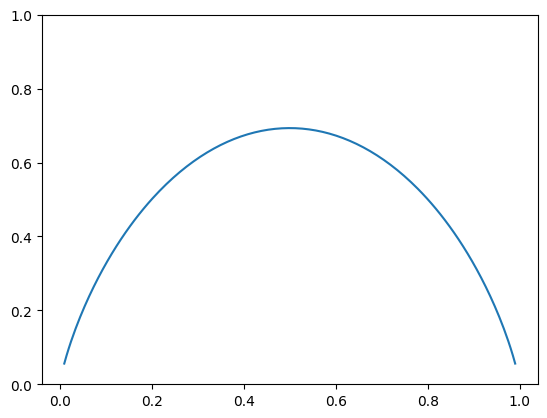

In [14]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
phos = np.linspace(pho_min,pho_max,200,endpoint=True)
entropys = entropy_per_block(phos)

plt.figure()
plt.plot(phos,entropys)
plt.ylim(0,1)
plt.show()

#### Link function per block

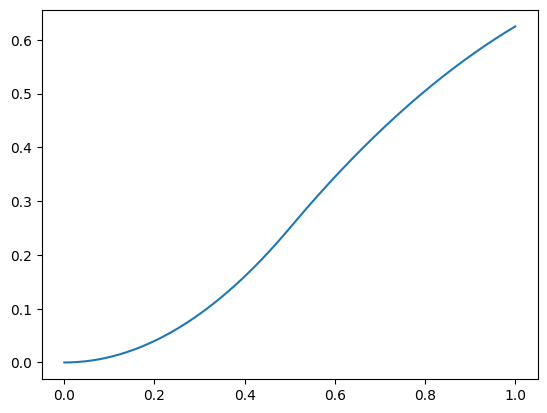

In [15]:
epsilon = 0
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
links = np.zeros(steps)
for i in range(steps):
    links[i] = link_function_per_block(phos[i])

plt.figure()
plt.plot(phos,links)
plt.show()

#### F potential per block

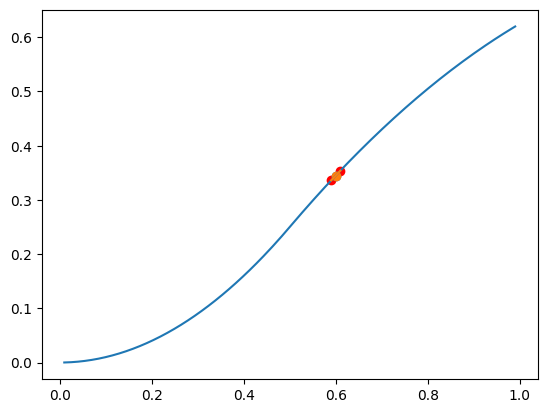

In [132]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 198
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
fs = dict()
for pho in phos:
    fs[pho] = thermodynamic_potential_F_per_block(pho)

plt.figure()
plt.plot(phos,list(fs.values()))

pho_t = 0.6
pho_a = 0.61
pho_b = 2*pho_T - pho_a

plt.plot([pho_a,pho_b],[thermodynamic_potential_F_per_block(pho_a),thermodynamic_potential_F_per_block(pho_b)])
plt.scatter(pho_a, thermodynamic_potential_F_per_block(pho_a),color='r')
plt.scatter(pho_b, thermodynamic_potential_F_per_block(pho_b),color='r')
plt.scatter(pho_T, thermodynamic_potential_F_per_block(pho_T))
plt.scatter(pho_T, (thermodynamic_potential_F_per_block(pho_a) + thermodynamic_potential_F_per_block(pho_b))/2)


plt.show()

#### Appendix Method

Algorithm that predicts final configurarion of Q = 2 system.

(0.6, 0.6)
Homogeneous


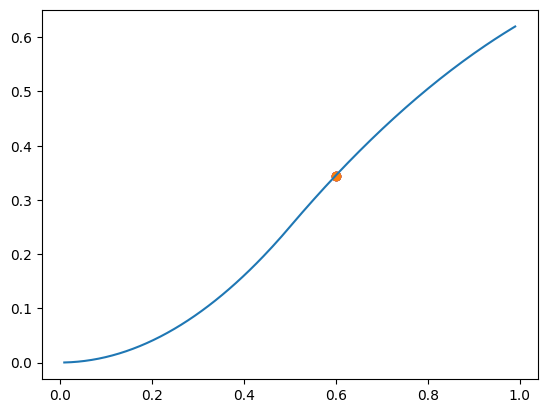

In [125]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 198
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
fs = dict()
for pho in phos:
    fs[pho] = thermodynamic_potential_F_per_block(pho)

pho_T = 0.6
visuals = False
if pho_T <= 0.5:
    space = np.linspace(pho_T,0,1000, endpoint=False)
else:
    space = np.linspace(pho_T,1,1000, endpoint=False)

counter = 0
maxi = -1
maxi_phos = (0,0)
final = "Homogeneous"
for value in space:
    pho_a = value
    pho_b = 2*pho_T - value
    counter += 1

    if (thermodynamic_potential_F_per_block(pho_a) + thermodynamic_potential_F_per_block(pho_b))/2 > maxi:
        maxi = (thermodynamic_potential_F_per_block(pho_a) + thermodynamic_potential_F_per_block(pho_b))/2
        maxi_phos = (pho_a, pho_b)

    if visuals and counter == 20:
        counter = 0
        plt.figure()
        plt.plot(phos,list(fs.values()))
        plt.plot([pho_a,pho_b],[thermodynamic_potential_F_per_block(pho_a),thermodynamic_potential_F_per_block(pho_b)])
        plt.scatter(pho_a, thermodynamic_potential_F_per_block(pho_a),color='r')
        plt.scatter(pho_b, thermodynamic_potential_F_per_block(pho_b),color='r')
        plt.scatter(pho_T, thermodynamic_potential_F_per_block(pho_T))
        plt.scatter(pho_T, (thermodynamic_potential_F_per_block(pho_a) + thermodynamic_potential_F_per_block(pho_b))/2)
        plt.show()
        time.sleep(0.5)
        display.clear_output(wait=True)

print(maxi_phos)
if maxi > thermodynamic_potential_F_per_block(pho_T):
    final = "Inomogeneous"
print(final)
plt.figure()
plt.plot(phos,list(fs.values()))
plt.plot([maxi_phos[0],maxi_phos[1]],[thermodynamic_potential_F_per_block(maxi_phos[0]),thermodynamic_potential_F_per_block(maxi_phos[1])])
plt.scatter(maxi_phos[0], thermodynamic_potential_F_per_block(maxi_phos[0]),color='r')
plt.scatter(maxi_phos[1], thermodynamic_potential_F_per_block(maxi_phos[1]),color='r')
plt.scatter(pho_T, thermodynamic_potential_F_per_block(pho_T))
plt.scatter(pho_T, (thermodynamic_potential_F_per_block(maxi_phos[0]) + thermodynamic_potential_F_per_block(maxi_phos[1]))/2)
plt.show()

#### System with two blocks

##### Graphs of F as a function of pho_1 (density of block 1)

alpha = 0.00
p_T = 0.10, p_1_max = 0.0001
p_T = 0.13, p_1_max = 0.0001
p_T = 0.16, p_1_max = 0.0001
p_T = 0.19, p_1_max = 0.0001
p_T = 0.22, p_1_max = 0.0001
p_T = 0.25, p_1_max = 0.0001
p_T = 0.28, p_1_max = 0.0001
p_T = 0.32, p_1_max = 0.0001
p_T = 0.35, p_1_max = 0.0001
p_T = 0.38, p_1_max = 0.0001
p_T = 0.41, p_1_max = 0.0001
p_T = 0.44, p_1_max = 0.0001
p_T = 0.47, p_1_max = 0.0001
p_T = 0.50, p_1_max = 0.0001
p_T = 0.53, p_1_max = 0.061638461538461545
p_T = 0.56, p_1_max = 0.12317692307692309
p_T = 0.59, p_1_max = 0.591899691999692
p_T = 0.62, p_1_max = 0.6226997227997229
p_T = 0.65, p_1_max = 0.6534997535997535
p_T = 0.68, p_1_max = 0.6842997843997844


C:\Users\alana\AppData\Local\Temp\ipykernel_13380\3814096219.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))


p_T = 0.72, p_1_max = 0.7150998151998151
p_T = 0.75, p_1_max = 0.745899845999846
p_T = 0.78, p_1_max = 0.7766998767998768
p_T = 0.81, p_1_max = 0.8074999075999076
p_T = 0.84, p_1_max = 0.8382999383999384
p_T = 0.87, p_1_max = 0.8690999691999692
p_T = 0.90, p_1_max = 0.8999


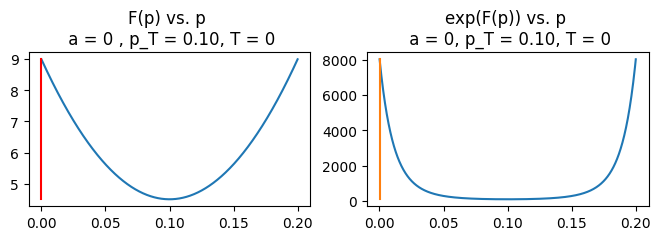

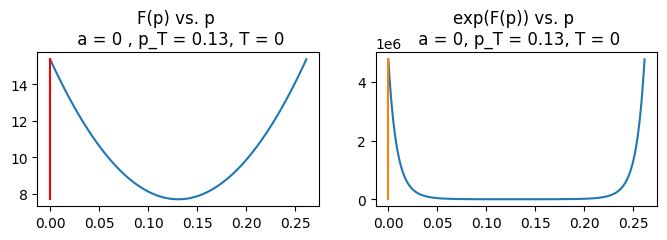

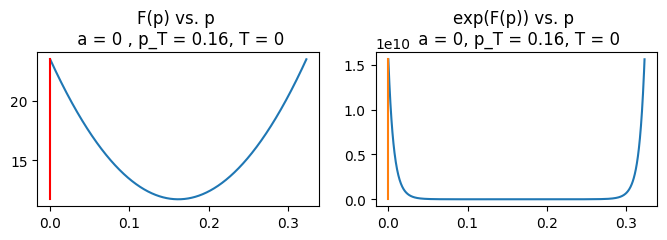

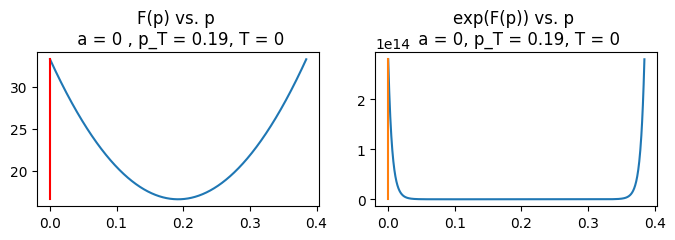

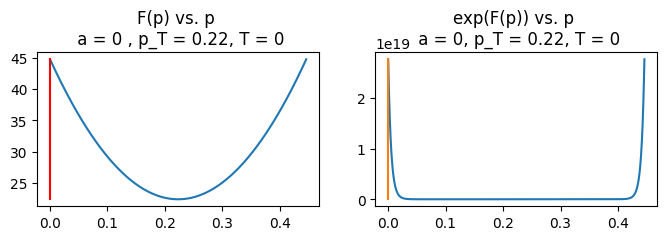

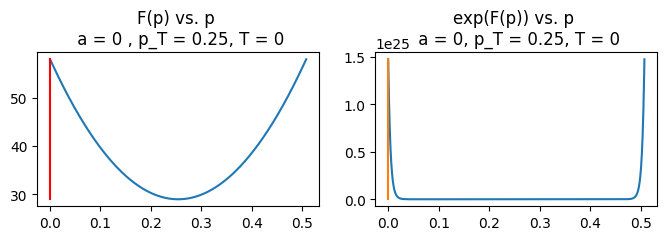

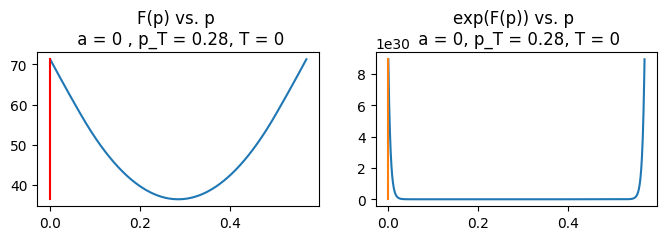

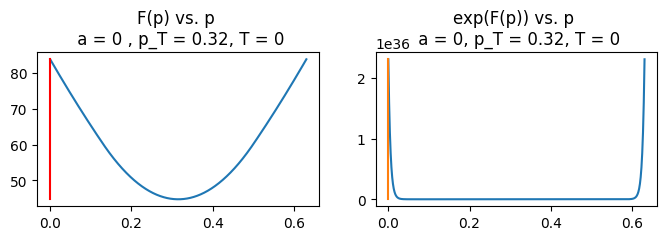

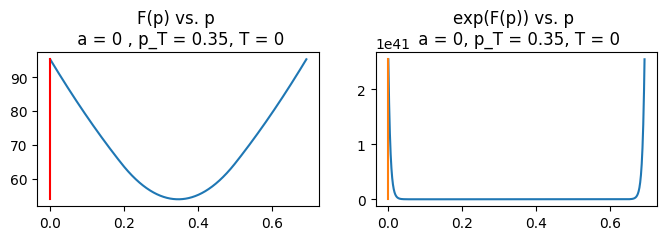

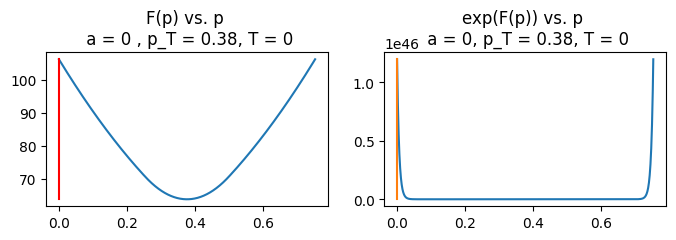

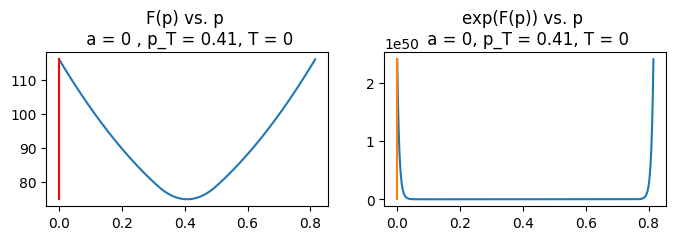

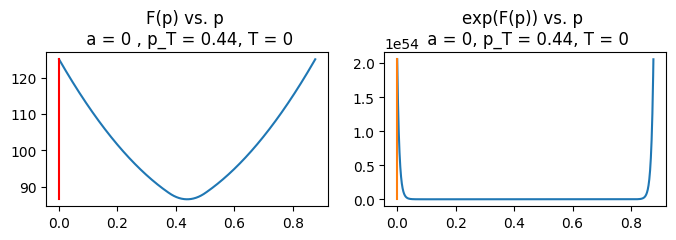

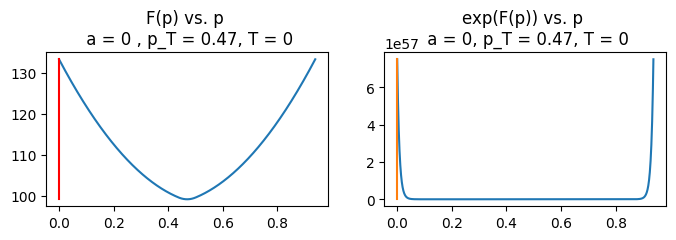

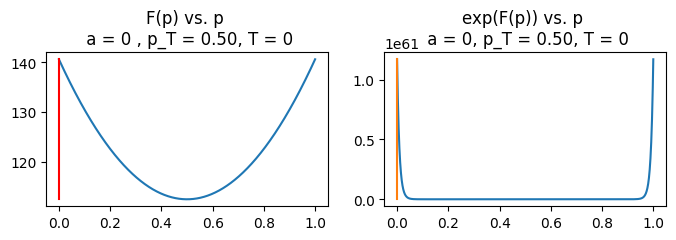

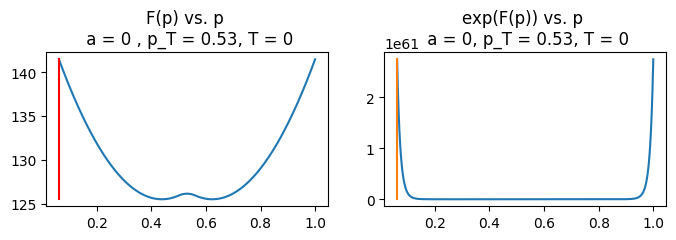

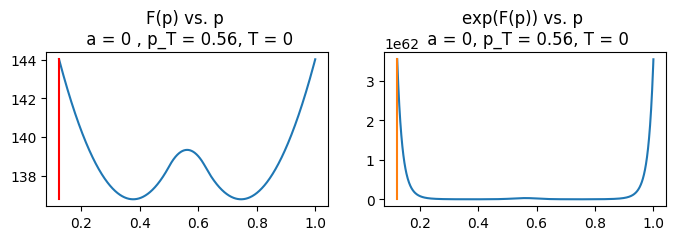

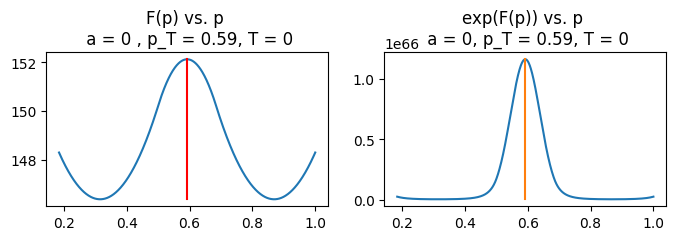

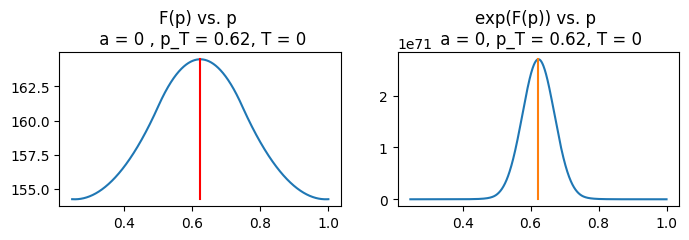

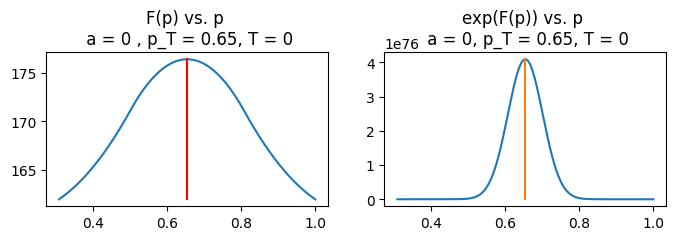

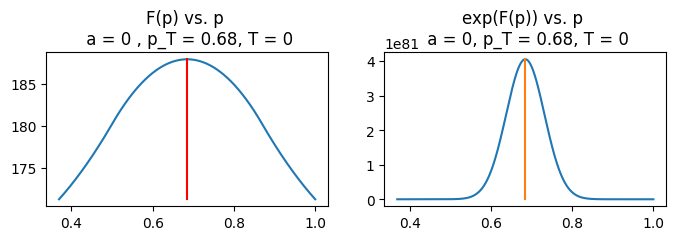

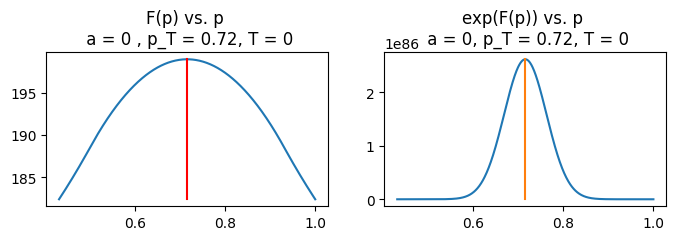

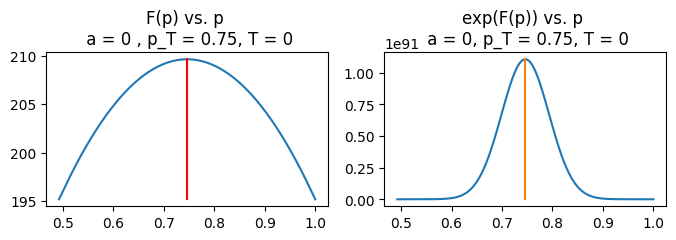

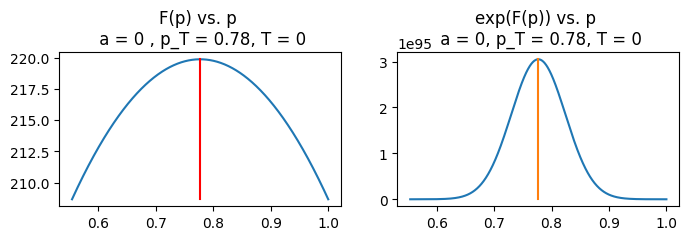

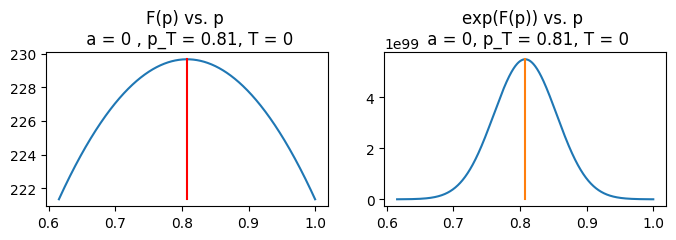

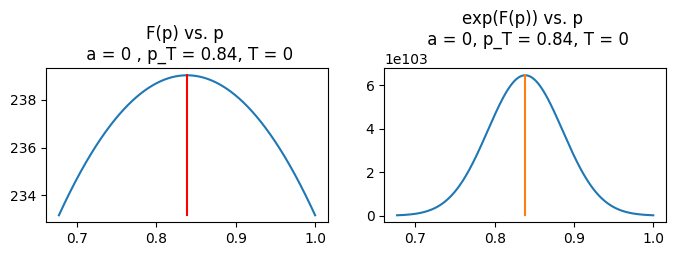

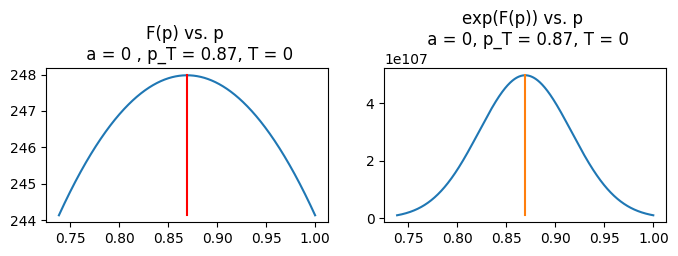

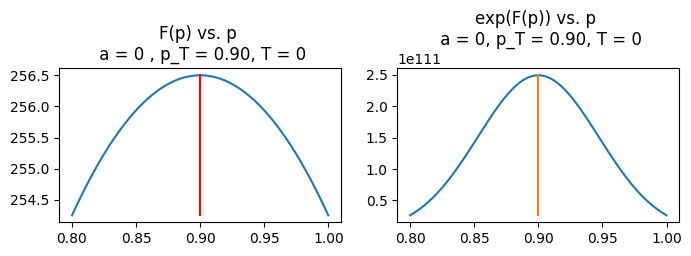

In [53]:
pho_Ts = np.linspace(0.1,0.9,27,endpoint=True)
epsilon = 0.0001

print(f"alpha = {alpha:.2f}")

for k in range(len(pho_Ts)):
    pho_T = pho_Ts[k]
    if pho_T > 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    steps = 1000
    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    #print(phos)
    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    potential_Fs = np.zeros(steps)
    max_F = 0
    i_max = 0

    for i in range(steps):
        potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
        if(potential_Fs[i] > max_F):
            max_F = potential_Fs[i]
            i_max = i

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))

    ax1.plot(phos,potential_Fs)
    ax1.plot([phos[i_max],phos[i_max]], [np.min(potential_Fs),potential_Fs[i_max]], color = 'r')
    ax1.set_title(f"F(p) vs. p \n a = {alpha} , p_T = {pho_T:.2f}, T = {T}")

    ax2.plot(phos, np.exp(potential_Fs))
    ax2.plot([phos[i_max],phos[i_max]], [min(np.exp(potential_Fs)),np.exp(potential_Fs[i_max])])
    ax2.set_title(f"exp(F(p)) vs. p \n a = {alpha}, p_T = {pho_T:.2f}, T = {T}")
    print(f'p_T = {pho_T:.2f}, p_1_max = {phos[i_max]}')

plt.show()

##### Graphs of segregation (red) or homogeneity (blue) of a system as a function of pho_total and alpha

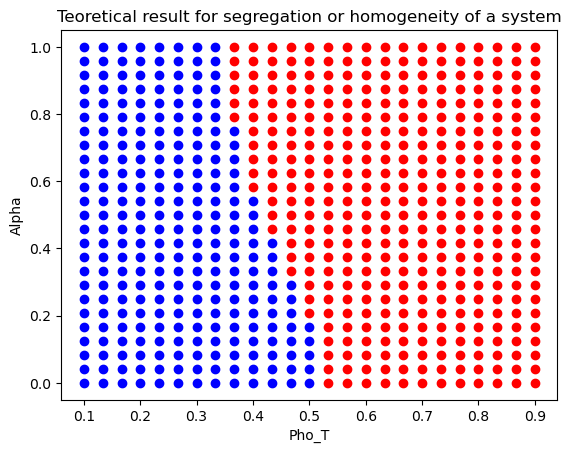

In [21]:
values = 25
pho_Ts = np.linspace(0.1,0.9,values,endpoint=True)
alphas = np.linspace(0, 1, values, endpoint=True)
epsilon = 0.001

plt.figure()

for a in range(len(alphas)):
    alpha = alphas[a]
    phos_of_max_F = np.zeros(len(pho_Ts))
    
    for k in range(len(pho_Ts)):
        pho_T = pho_Ts[k]
        if pho_T >= 0.5:
            pho_min = 2*pho_T - 1 + epsilon
            pho_max = 1 - epsilon
        else:
            pho_min = 0 + epsilon
            pho_max = 2*pho_T - epsilon

        steps = 200
        phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
        pho_array = np.zeros([steps,2])
        for i in range(steps):
            pho = phos[i]
            pho_2 = 2 * (pho_T - pho/2)
            pho_array[i] = [pho,pho_2]

        potential_Fs = np.zeros(steps)

        max_F = 0
        i_max = 0

        for i in range(steps):
            potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
            if(potential_Fs[i] > max_F):
                max_F = potential_Fs[i]
                i_max = i
        
        phos_of_max_F[k] = phos[i_max]
    
        if(phos_of_max_F[k] <= 0.01):
            color = 'blue'
        else:
            color = 'red'
            
        plt.scatter(pho_T, alpha, color = color)
        
    """
    plt.figure()
    plt.plot(pho_Ts, phos_of_max_F)
    plt.xlabel("Pho_Total values")
    plt.ylabel("Pho values that  maximize the F function")
    plt.show()
    """
plt.xlabel('Pho_T')
plt.ylabel('Alpha')
plt.title('Teoretical result for segregation or homogeneity of a system')
plt.show()

##### Graphs of exp(F) as a function of pho_1 (density of block 1) and alpha

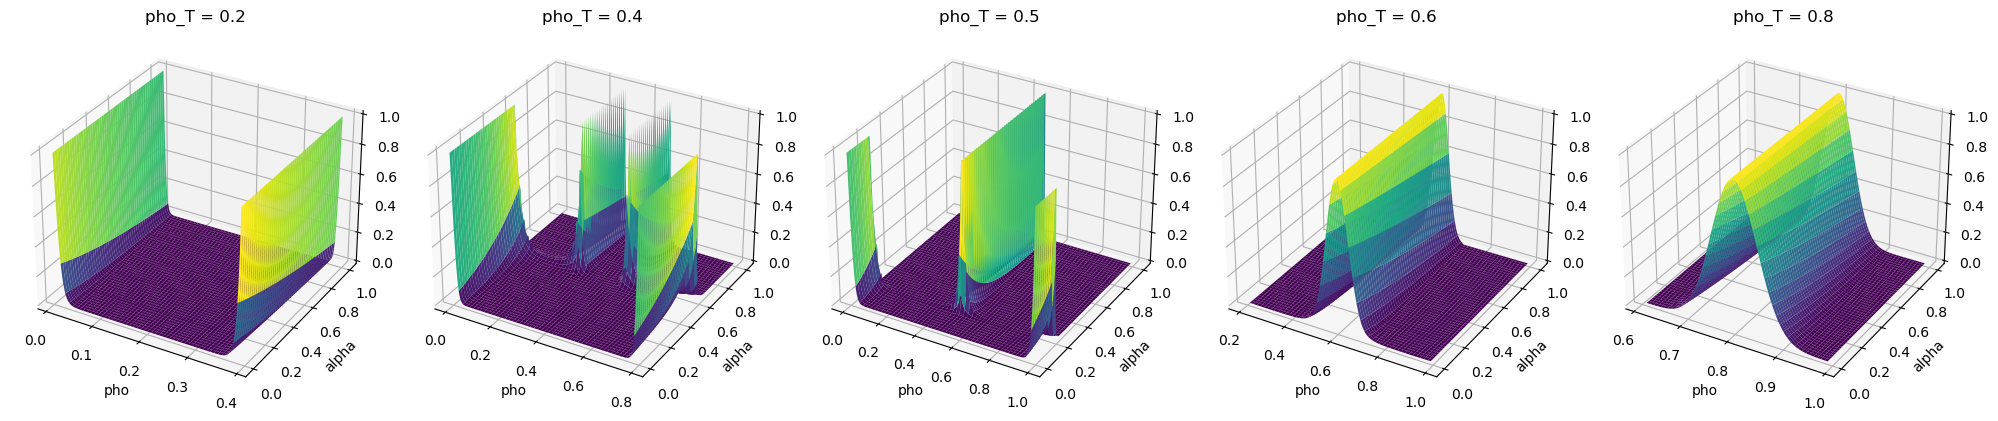

In [100]:
from mpl_toolkits.mplot3d import Axes3D

def thermodynamic_potential_F_per_block_THISCELL(pho, alpha):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

def thermodynamic_potential_F_THISCELL(pho_array, alpha):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block_THISCELL(pho, alpha)
    summation *= H
    return summation

fig = plt.figure(figsize=(20, 4))
phos_T = [0.2, 0.4, 0.5, 0.6, 0.8]

for k in range(len(phos_T)):
    pho_T = phos_T[k]
    
    # Data
    epsilon = 0.01

    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    alpha_min = 0
    alpha_max = 1

    steps = 200

    normalize = True

    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    alphas = np.linspace(alpha_min,alpha_max,steps,endpoint=True)

    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    # Z values
    Z = np.zeros([steps,steps])

    for i in range(steps):
        for j in range(steps):
            Z[i,j] = thermodynamic_potential_F_THISCELL(pho_array[j], alphas[i])
            Z[i,j] = np.exp(Z[i,j])

    # normalizing Z
    if normalize:
        for i in range(steps):
            Z_max = max(Z[i])
            Z_min = min(Z[i])
            for j in range(steps):
                Z[i,j] = (Z[i,j] - Z_min) / (Z_max - Z_min)

    # create grid
    phos, alphas = np.meshgrid(phos, alphas)

    # create 3d figure
    ax = fig.add_subplot(int(str(1) + str(len(phos_T)) + str(k+1)), projection='3d')

    # create graph
    surface = ax.plot_surface(phos, alphas, Z, cmap='viridis')

    # labels
    ax.set_title(f'pho_T = {pho_T}')
    ax.set_xlabel('pho')
    ax.set_ylabel('alpha')
    ax.set_zlabel('Z')
    
    
plt.tight_layout()
plt.show()

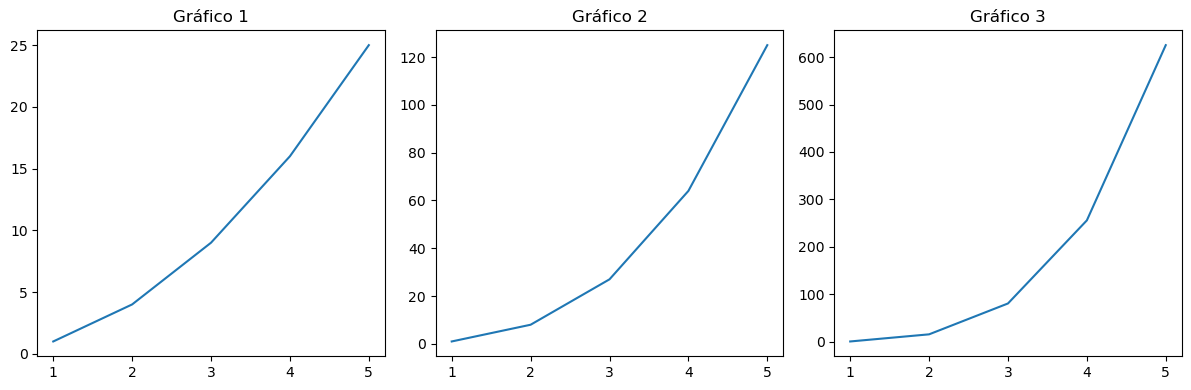

In [184]:
# Crie alguns dados de exemplo para os gráficos
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 8, 27, 64, 125]
y3 = [1, 16, 81, 256, 625]

# Crie a primeira figura e o primeiro subplot
plt.figure(figsize=(16, 4))  # Tamanho da figura
plt.subplot(141)  # Subplot 1 de 3

# Plote o primeiro gráfico
plt.plot(x, y1)
plt.title('Gráfico 1')

# Crie o segundo subplot
plt.subplot(142)  # Subplot 2 de 3

# Plote o segundo gráfico
plt.plot(x, y2)
plt.title('Gráfico 2')

# Crie o terceiro subplot
plt.subplot(143)  # Subplot 3 de 3

# Plote o terceiro gráfico
plt.plot(x, y3)
plt.title('Gráfico 3')

# Ajuste o layout para evitar sobreposições
plt.tight_layout()

# Exiba os gráficos
plt.show()


#### System with Q blocks

In [ ]:
pho_Ts = np.linspace(0.1,0.9,17,endpoint=True)
epsilon = 0.001

for k in range(len(pho_Ts)):
    pho_T = pho_Ts[k]
    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    steps = 200
    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    potential_Fs = np.zeros(steps)

    max_F = 0
    i_max = 0

    for i in range(steps):
        potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
        if(potential_Fs[i] > max_F):
            max_F = potential_Fs[i]
            i_max = i

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(phos,potential_Fs)
    ax1.plot([phos[i_max],phos[i_max]], [np.min(potential_Fs),potential_Fs[i_max]], color = 'r')
    ax1.set_title(f"F((p)) vs. p \n a = {alpha} , p_0 = {pho_T:.2f}, T = {T}")

    ax2.plot(phos, np.exp(potential_Fs))
    ax2.plot([phos[i_max],phos[i_max]], [min(np.exp(potential_Fs)),np.exp(potential_Fs[i_max])])
    ax2.set_title(f"exp(F((p))) vs. p \n a = {alpha}, p_0 = {pho_T:.2f}, T = {T}")

plt.show()